In [32]:
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [33]:
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

In [34]:
data = get_stock_data('AAPL', '2015-01-01', '2023-12-31')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.466454,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.777195,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.779432,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.112869,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.039331,237458000
...,...,...,...,...,...,...
2023-12-15,197.529999,198.399994,197.000000,197.570007,197.570007,128256700
2023-12-18,196.089996,196.630005,194.389999,195.889999,195.889999,55751900
2023-12-19,196.160004,196.949997,195.889999,196.940002,196.940002,40714100


In [35]:
X = data.drop('Open', axis=1) 
y = data['Volume']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [38]:
k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
y_pred = knn_model.predict(X_test_scaled)

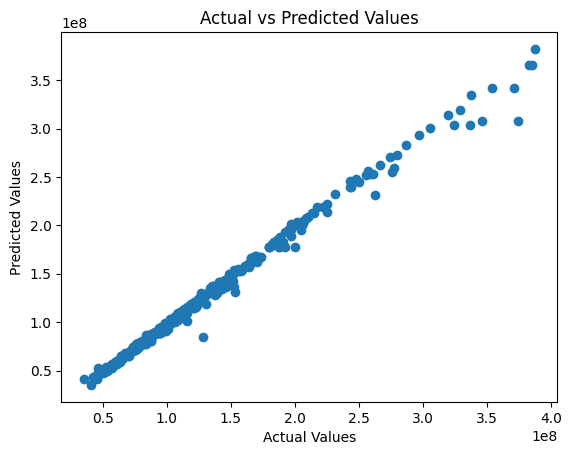

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()
